In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
import os
for dirname, _, filenames in os.walk('/content/creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('/content/creditcard.csv')

# Check basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89220 entries, 0 to 89219
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89220 non-null  int64  
 1   V1      89220 non-null  float64
 2   V2      89220 non-null  float64
 3   V3      89220 non-null  float64
 4   V4      89220 non-null  float64
 5   V5      89220 non-null  float64
 6   V6      89220 non-null  float64
 7   V7      89220 non-null  float64
 8   V8      89220 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22

In [4]:
print(data['Class'].value_counts())

Class
0.0    89008
1.0      211
Name: count, dtype: int64


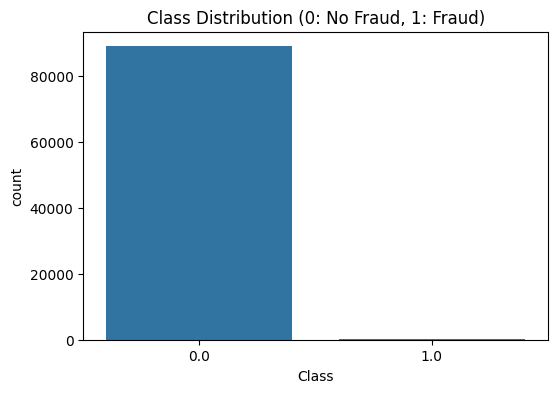

Class Distribution:
Class
0.0    89008
1.0      211
Name: count, dtype: int64


In [5]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

# Print class distribution in numbers
class_counts = data['Class'].value_counts()
print(f"Class Distribution:\n{class_counts}")

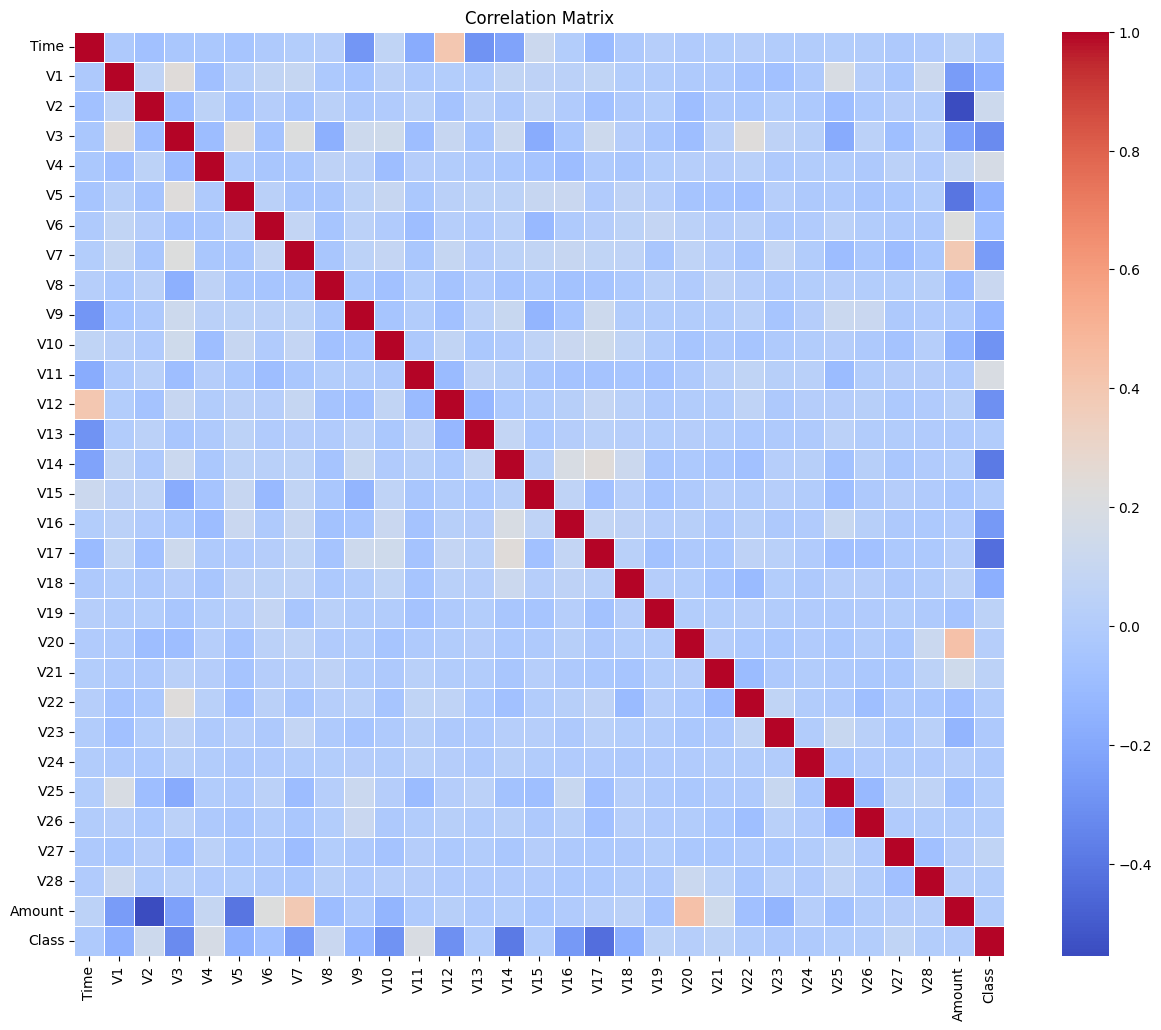

In [6]:
# Plot the correlation matrix
plt.figure(figsize=(15, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Standardize the 'Amount' and 'Time' columns
scaler = StandardScaler()
data['scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [8]:
# Drop the original 'Amount' and 'Time' columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.191383,-2.478100
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.359041,-2.478100
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.049404,-2.478038
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.093533,-2.478038
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.106924,-2.477975


In [10]:
X = data.drop('Class', axis=1)
y = data['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Check the shapes of training and testing sets
X_train.shape, X_test.shape

((71376, 30), (17844, 30))

In [15]:
# Handle class imbalance using undersampling
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample the non-fraudulent transactions
non_fraud_sample = non_fraud.sample(len(fraud))

# Create a new balanced dataset
balanced_data = pd.concat([fraud, non_fraud_sample])

# Split into features and target
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']

# Train-test split for balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [16]:
# Build a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_bal = rf.predict(X_test_bal)

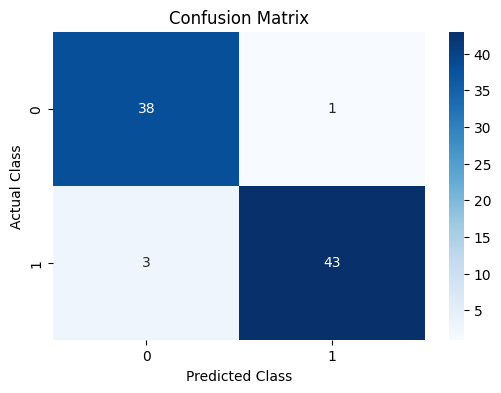

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [18]:
 #Classification report
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        39
         1.0       0.98      0.93      0.96        46

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



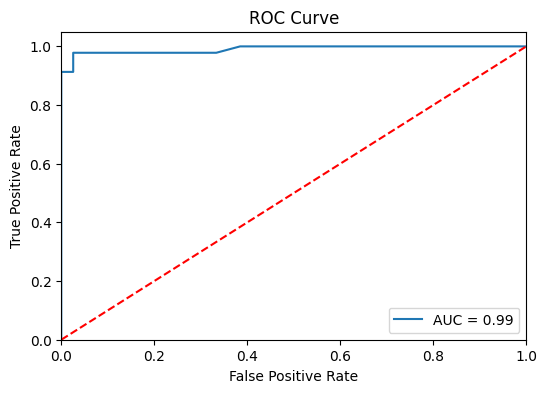

In [19]:
# ROC Curve and AUC
y_pred_prob = rf.predict_proba(X_test_bal)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bal, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

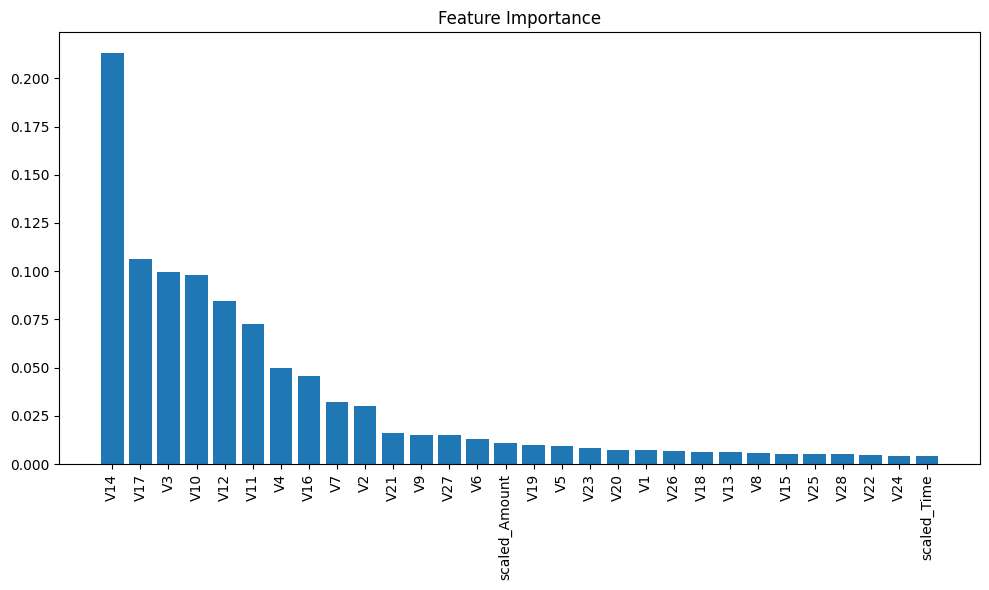

In [20]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()